#**TRABALHO DE EOAD - MÓDULO I**

---
Grupo N.º 8

Trabalho realizado por:
 
Ana Pinho, 97727 

---

# **Introdução**

O presente trabalho, inserido no âmbito do Módulo 1 - Estatística Univariada do curso EOAD propõe uma análise detalhada das estatísticas do Instituto Nacional de Estatística (INE) relacionadas com a população e habitação por nível de freguesias em Portugal. O foco principal deste estudo recai sobre a base de dados BGRI2011_PT_FREG.csv, que contém informações abrangentes sobre 143 variáveis, permitindo-nos explorar e inferir padrões significativos na Região de Aveiro, enquadrada nas NUTS 3.

O trabalho, desenvolvido em grupos com um máximo de três elementos, tem como principal objetivo realizar uma Análise Exploratória de Dados (AED) e uma Análise Inferencial de Dados (AID) com base em três indicadores fundamentais: a percentagem de alojamento em arrendamento, a idade média do edificado e a dimensão média dos alojamentos.

<br>

**Definição do Problema:**

No contexto da Região de Aveiro, pretendemos compreender e interpretar as características demográficas e habitacionais, utilizando as ferramentas estatísticas disponíveis. As questões-chave a serem abordadas incluem a distribuição da percentagem de alojamento em arrendamento, a média de idade dos edifícios e a dimensão média dos alojamentos.

<br>

**Objetivos:**


*   Realizar uma Análise Exploratória de Dados (AED) das variáveis selecionadas, nomeadamente a percentagem de alojamento em arrendamento, a idade média do edificado e a dimensão média dos alojamentos.
*   Calcular e interpretar as principais estatísticas descritivas, incluindo medidas de centralidade e dispersão, para proporcionar uma compreensão abrangente das variáveis em estudo.
*   Construir gráficos adequados, como histogramas e boxplots, para visualizar a distribuição dos indicadores, identificando possíveis missing values e outliers.
*   Realizar uma Análise Inferencial de Dados (AID), definindo probabilidades para diferentes cenários, tais como a probabilidade de uma freguesia ter uma percentagem de alojamento para arrendamento inferior a 5%, uma idade média do edificado superior a 50 anos, e uma dimensão média dos alojamentos entre 80 e 120m².
*   Estabelecer intervalos de confiança a 90%, 95% e 99% para cada uma das variáveis selecionadas, comparando os resultados obtidos na amostra da Região de Aveiro com os dados referentes a todo o país.

<br>

Ao abordar estas questões, almejamos contribuir para uma compreensão mais aprofundada das dinâmicas habitacionais e demográficas na Região de Aveiro, proporcionando insights relevantes para apoiar processos de decisão informada.

# **Importações e Pre-processamento**

## **Import libraries**

In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from tabulate import tabulate
from IPython.display import HTML

## **Import dataset**

In [207]:
from google.colab import files
uploaded = files.upload()

Saving BGRI2011_PT_FREG.csv to BGRI2011_PT_FREG (3).csv


In [208]:
df_BGRI =pd.read_csv('BGRI2011_PT_FREG.csv')

<ipython-input-208-eb2653fe00c9>:1: DtypeWarning: Columns (135) have mixed types. Specify dtype option on import or set low_memory=False.
  df_BGRI =pd.read_csv('BGRI2011_PT_FREG.csv')


In [209]:
df_BGRI.columns

Index(['ANO', 'GEO_COD', 'GEO_COD_DSG', 'NIVEL', 'NIVEL_DSG',
       'N_EDIFICIOS_CLASSICOS', 'N_EDIFICIOS_CLASSICOS_1OU2',
       'N_EDIFICIOS_CLASSICOS_ISOLADOS', 'N_EDIFICIOS_CLASSICOS_GEMIN',
       'N_EDIFICIOS_CLASSICOS_EMBANDA',
       ...
       'NUTSII_COD', 'NUTSIII_DSG', 'NUTSIII_COD', 'DISTRITO_ILHA_DSG',
       'CONCELHO_DSG', 'AREA_2019_ha', 'AREA_2019_km2', 'PERIM_km',
       'ALTITUDE_MAX_m', 'ALTITUDE_MIN_m'],
      dtype='object', length=143)

In [210]:
df_BGRI

,ANO,GEO_COD,GEO_COD_DSG,NIVEL,NIVEL_DSG,N_EDIFICIOS_CLASSICOS,N_EDIFICIOS_CLASSICOS_1OU2,N_EDIFICIOS_CLASSICOS_ISOLADOS,N_EDIFICIOS_CLASSICOS_GEMIN,N_EDIFICIOS_CLASSICOS_EMBANDA,...,NUTSII_COD,NUTSIII_DSG,NUTSIII_COD,DISTRITO_ILHA_DSG,CONCELHO_DSG,AREA_2019_ha,AREA_2019_km2,PERIM_km,ALTITUDE_MAX_m,ALTITUDE_MIN_m
0,2011,10101,Agadão,6,Freguesia,204,204,197,7,0,...,16,REGIÃO DE AVEIRO,16D,AVEIRO,ÁGUEDA,33527.44,335.27,105,762,4
1,2011,10102,Aguada de Baixo,6,Freguesia,574,559,497,20,42,...,16,REGIÃO DE AVEIRO,16D,AVEIRO,ÁGUEDA,33527.44,335.27,105,762,4
2,2011,10103,Aguada de Cima,6,Freguesia,1653,1580,1346,101,133,...,16,REGIÃO DE AVEIRO,16D,AVEIRO,ÁGUEDA,33527.44,335.27,105,762,4
3,2011,10104,Águeda,6,Freguesia,3485,3141,2251,558,332,...,16,REGIÃO DE AVEIRO,16D,AVEIRO,ÁGUEDA,33527.44,335.27,105,762,4
4,2011,10105,Barrô,6,Freguesia,784,772,642,28,102,...,16,REGIÃO DE AVEIRO,16D,AVEIRO,ÁGUEDA,33527.44,335.27,105,762,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4255,2011,480201,Caveira,6,Freguesia,49,49,49,0,0,...,20,REGIÃO AUTÓNOMA DOS AÇORES,200,ILHA DAS FLORES,SANTA CRUZ DAS FLORES,7091.44,70.91,52,914,0
4256,2011,480202,Cedros,6,Freguesia,84,84,84,0,0,...,20,REGIÃO AUTÓNOMA DOS AÇORES,200,ILHA DAS FLORES,SANTA CRUZ DAS FLORES,7091.44,70.91,52,914,0
4257,2011,480203,Ponta Delgada,6,Freguesia,205,204,173,11,20,...,20,REGIÃO AUTÓNOMA DOS AÇORES,200,ILHA DAS FLORES,SANTA CRUZ DAS FLORES,7091.44,70.91,52,914,0
4258,2011,480204,Santa Cruz das Flores,6,Freguesia,768,751,641,109,1,...,20,REGIÃO AUTÓNOMA DOS AÇORES,200,ILHA DAS FLORES,SANTA CRUZ DAS FLORES,7091.44,70.91,52,914,0


## **I-PRE-PROCESSAMENTO**

### **Seleção da amostra da base de dados: Região de Aveiro**


In [211]:
df_BGRI['NUTSIII_DSG'].unique()

array(['REGIÃO DE AVEIRO', 'ÁREA METROPOLITANA DO PORTO',
       'TÂMEGA E SOUSA', 'REGIÃO DE COIMBRA', 'BAIXO ALENTEJO',
       'ALENTEJO LITORAL', 'CÁVADO', 'AVE', 'TERRAS DE TRÁS-OS-MONTES',
       'DOURO', 'BEIRAS E SERRA DA ESTRELA', 'BEIRA BAIXA', 'MÉDIO TEJO',
       'ALENTEJO CENTRAL', 'ALGARVE', 'VISEU DÃO LAFÕES', 'OESTE',
       'REGIÃO DE LEIRIA', 'LEZÍRIA DO TEJO',
       'ÁREA METROPOLITANA DE LISBOA', 'ALTO ALENTEJO', 'ALTO MINHO',
       'ALTO TÂMEGA', 'REGIÃO AUTÓNOMA DA MADEIRA',
       'REGIÃO AUTÓNOMA DOS AÇORES'], dtype=object)

In [212]:
#seleção da base de dados (subset) --> neste caso para os municípios
df_BGRI_s = df_BGRI[df_BGRI["NUTSIII_DSG"]=="REGIÃO DE AVEIRO"]

In [213]:
df_BGRI_s

,ANO,GEO_COD,GEO_COD_DSG,NIVEL,NIVEL_DSG,N_EDIFICIOS_CLASSICOS,N_EDIFICIOS_CLASSICOS_1OU2,N_EDIFICIOS_CLASSICOS_ISOLADOS,N_EDIFICIOS_CLASSICOS_GEMIN,N_EDIFICIOS_CLASSICOS_EMBANDA,...,NUTSII_COD,NUTSIII_DSG,NUTSIII_COD,DISTRITO_ILHA_DSG,CONCELHO_DSG,AREA_2019_ha,AREA_2019_km2,PERIM_km,ALTITUDE_MAX_m,ALTITUDE_MIN_m
0,2011,10101,Agadão,6,Freguesia,204,204,197,7,0,...,16,REGIÃO DE AVEIRO,16D,AVEIRO,ÁGUEDA,33527.44,335.27,105,762,4
1,2011,10102,Aguada de Baixo,6,Freguesia,574,559,497,20,42,...,16,REGIÃO DE AVEIRO,16D,AVEIRO,ÁGUEDA,33527.44,335.27,105,762,4
2,2011,10103,Aguada de Cima,6,Freguesia,1653,1580,1346,101,133,...,16,REGIÃO DE AVEIRO,16D,AVEIRO,ÁGUEDA,33527.44,335.27,105,762,4
3,2011,10104,Águeda,6,Freguesia,3485,3141,2251,558,332,...,16,REGIÃO DE AVEIRO,16D,AVEIRO,ÁGUEDA,33527.44,335.27,105,762,4
4,2011,10105,Barrô,6,Freguesia,784,772,642,28,102,...,16,REGIÃO DE AVEIRO,16D,AVEIRO,ÁGUEDA,33527.44,335.27,105,762,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,2011,11807,Sosa,6,Freguesia,1385,1381,1330,13,38,...,16,REGIÃO DE AVEIRO,16D,AVEIRO,VAGOS,16491.50,164.92,60,68,0
195,2011,11808,Vagos,6,Freguesia,1672,1537,1078,188,271,...,16,REGIÃO DE AVEIRO,16D,AVEIRO,VAGOS,16491.50,164.92,60,68,0
196,2011,11809,Santo António de Vagos,6,Freguesia,694,683,674,9,0,...,16,REGIÃO DE AVEIRO,16D,AVEIRO,VAGOS,16491.50,164.92,60,68,0
197,2011,11810,Santo André de Vagos,6,Freguesia,923,901,891,8,2,...,16,REGIÃO DE AVEIRO,16D,AVEIRO,VAGOS,16491.50,164.92,60,68,0


## **Funções**


### Funções para "ANÁLISE EXPLORATÓRIA DE DADOS - Parte 1"

In [244]:
pd.options.mode.chained_assignment = None
def calculate_percentage_arrendamento(df):
    df['arrendamento_perc'] = (df["N_RES_HABITUAL_ARREND"] / df["N_ALOJAMENTOS_FAMILIARES"]) * 100
    return df['arrendamento_perc'].describe()

def calculate_mean_years(df):
    total_edificios = (df.N_EDIFICIOS_CONSTR_ANTES_1919) + (df.N_EDIFICIOS_CONSTR_1919A1945) + (df.N_EDIFICIOS_CONSTR_1946A1960) + (df.N_EDIFICIOS_CONSTR_1961A1970) + (df.N_EDIFICIOS_CONSTR_1971A1980) + (df.N_EDIFICIOS_CONSTR_1981A1990) + (df.N_EDIFICIOS_CONSTR_1991A1995) + (df.N_EDIFICIOS_CONSTR_1996A2000) + (df.N_EDIFICIOS_CONSTR_2001A2005) + (df.N_EDIFICIOS_CONSTR_2006A2011)
    df['IMédia_edif'] = (((2011-1910)*df.N_EDIFICIOS_CONSTR_ANTES_1919) + ((2011-1932)*df.N_EDIFICIOS_CONSTR_1919A1945) + ((2011-1953)*df.N_EDIFICIOS_CONSTR_1946A1960) + ((2011-1965.5)*df.N_EDIFICIOS_CONSTR_1961A1970) + ((2011-1975.5)*df.N_EDIFICIOS_CONSTR_1971A1980) + ((2011-1985.5)*df.N_EDIFICIOS_CONSTR_1981A1990) + ((2011-1993)*df.N_EDIFICIOS_CONSTR_1991A1995) + ((2011-1998)*df.N_EDIFICIOS_CONSTR_1996A2000) + ((2011-2003)*df.N_EDIFICIOS_CONSTR_2001A2005) + ((2011-2008.5)*df.N_EDIFICIOS_CONSTR_2006A2011)) / total_edificios
    return df['IMédia_edif'].describe()

def calculate_dimensao_aloj(df):
    total_edificios = (df.N_RES_HABITUAL_AREA_50) + (df.N_RES_HABITUAL_AREA_50_100) + (df.N_RES_HABITUAL_AREA_100_200) + (df.N_RES_HABITUAL_AREA_200)
    dimensao = ((df.N_RES_HABITUAL_AREA_50 * 25) + (df.N_RES_HABITUAL_AREA_50_100 * 75) + (df.N_RES_HABITUAL_AREA_100_200 * 150) + (df.N_RES_HABITUAL_AREA_200 * 300))
    df['dimensao_aloj'] = dimensao / total_edificios
    return df['dimensao_aloj'].describe()

def display_results(title, description):
    print(title)
    print(tabulate(description.reset_index(), headers=['Estatística', 'Valor'], tablefmt='fancy_grid', showindex=False, numalign='center'))
    print("\n")


### Funções para "ANÁLISE EXPLORATÓRIA DE DADOS - Parte 2"

In [269]:
def plot_histogram(df_aveiro, df_portugal, column, title, xlabel, color_aveiro, color_portugal):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    sns.histplot(df_aveiro[column], ax=axes[0], color=color_aveiro)
    axes[0].set_title(f'Histograma {title} - Região de Aveiro')
    axes[0].set_xlabel(f'{xlabel} - Região de Aveiro')
    axes[0].set_ylabel('Frequência')
    axes[0].axvline(df_aveiro[column].mean(), color='#FFBF00', linestyle='dashed', linewidth=2)

    sns.histplot(df_portugal[column], ax=axes[1], color=color_portugal)
    axes[1].set_title(f'Histograma {title} - Portugal')
    axes[1].set_xlabel(f'{xlabel} - Portugal')
    axes[1].set_ylabel('Frequência')
    axes[1].axvline(df_portugal[column].mean(), color='#FFBF00', linestyle='dashed', linewidth=2)

    plt.tight_layout()
    plt.show()

def plot_boxplot(df_aveiro, df_portugal, column, title, xlabel, color_aveiro, color_portugal):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Defina os limites do eixo y com base no DataFrame df_portugal
    y_limit = (min(df_portugal[column]), max(df_portugal[column]))

    # Boxplot para Aveiro
    b_plot_aveiro = sns.boxplot(df_aveiro[column], color=color_aveiro, ax=axes[0])
    b_plot_aveiro.set_title(f'Boxplot {title} - Região de Aveiro')
    b_plot_aveiro.set_xlabel(xlabel)
    b_plot_aveiro.set_ylabel('Frequência')
    b_plot_aveiro.set_ylim(y_limit)  # Defina os limites do eixo y

    # Boxplot para Portugal
    b_plot_portugal = sns.boxplot(df_portugal[column], color=color_portugal, ax=axes[1])
    b_plot_portugal.set_title(f'Boxplot {title} - Portugal')
    b_plot_portugal.set_xlabel(xlabel)
    b_plot_portugal.set_ylabel('Frequência')
    b_plot_portugal.set_ylim(y_limit)  # Defina os limites do eixo y

    plt.tight_layout()
    plt.show()

### Funções para "ANÁLISE INFERENCIAL DE DADOS - Parte 2"

In [246]:
def calculate_confidence_interval(data, confidence_level):
    mean = data.mean()
    std = data.std()
    return stats.norm.interval(confidence_level, loc=mean, scale=std)

def plot_confidence_interval(data, confidence_level, color, label, xlabel, title):
    conf_interval = calculate_confidence_interval(data, confidence_level)

    std_dev = data.std()  # Use data.std() instead of std directly from calculate_confidence_interval
    x = np.linspace(conf_interval[0] - 3 * std_dev, conf_interval[1] + 3 * std_dev, 1000)

    plt.figure(figsize=(10, 5))
    plt.plot(x, stats.norm.pdf(x, loc=data.mean(), scale=data.std()), color="black", label="Distribuição Normal")
    plt.fill_between(x, 0, stats.norm.pdf(x, loc=data.mean(), scale=data.std()),
                     where=(x >= conf_interval[0]) & (x <= conf_interval[1]), alpha=0.5, color=color, label=f'Intervalo de Confiança ({confidence_level * 100}%)')

    plt.axvline(x=conf_interval[0], color='#ff715b', linestyle='--', label=f'Linha do Limite Inferior: {conf_interval[0]:.3f}')
    plt.axvline(x=conf_interval[1], color='#B2DA2F', linestyle='--', label=f'Linha do Limite Superior: {conf_interval[1]:.3f}')

    plt.xlabel(xlabel)
    plt.ylabel("Densidade de Probabilidade")
    plt.title(title)
    plt.legend()
    plt.grid()

    plt.show()

# **Análises**

## **II - ANÁLISE EXPLORATÓRIA DE DADOS - Parte 1**

**Calculo e Interpretação dos Indicadores**

**II.1. Calculo e interpretação das principais estatísticas descritivas dos três indicadores selecionadas e comparação com entre o país e a região de Aveiro**


In [241]:
# Calculate and display results for Percentagem do Arrendamento - País
description_arrendamento_pais = calculate_percentage_arrendamento(df_BGRI)
display_results("Percentagem do Arrendamento - País", description_arrendamento_pais)

# Calculate and display results for Percentagem do Arrendamento - Região de Aveiro
description_arrendamento_aveiro = calculate_percentage_arrendamento(df_BGRI_s)
display_results("Percentagem do Arrendamento - Região de Aveiro", description_arrendamento_aveiro)

Percentagem do Arrendamento - País
╒═══════════════╤══════════╕
│ Estatística   │  Valor   │
╞═══════════════╪══════════╡
│ count         │   4260   │
├───────────────┼──────────┤
│ mean          │ 6.47362  │
├───────────────┼──────────┤
│ std           │  7.8589  │
├───────────────┼──────────┤
│ min           │    0     │
├───────────────┼──────────┤
│ 25%           │ 0.712348 │
├───────────────┼──────────┤
│ 50%           │ 3.30069  │
├───────────────┼──────────┤
│ 75%           │  9.8312  │
├───────────────┼──────────┤
│ max           │ 62.0387  │
╘═══════════════╧══════════╛


Percentagem do Arrendamento - Região de Aveiro
╒═══════════════╤═════════╕
│ Estatística   │  Valor  │
╞═══════════════╪═════════╡
│ count         │   106   │
├───────────────┼─────────┤
│ mean          │ 6.41535 │
├───────────────┼─────────┤
│ std           │ 4.93667 │
├───────────────┼─────────┤
│ min           │    0    │
├───────────────┼─────────┤
│ 25%           │ 2.51081 │
├───────────────┼─────────┤
│

A comparação das percentagens de arrendamento entre o país e a Região de Aveiro revela padrões distintos. A nível nacional, a média de arrendamento é de 6.47362, com um desvio padrão de 7.8589. A variação é significativa, variando de 0 a 62.0387. Os percentis indicam que 25% das áreas têm uma percentagem de arrendamento até 0.712348, 50% até 3.30069, e 75% até 9.8312.

Ao considerar a Região de Aveiro, a média de arrendamento é ligeiramente inferior (6.41535), com um desvio padrão menor de 4.93667. A variação vai de 0 a 25.1648. Os percentis revelam que 25% das áreas têm uma percentagem de arrendamento até 2.51081, 50% até 5.36312, e 75% até 9.75121.

Essa análise aponta para semelhanças na média de arrendamento entre o país e Aveiro, com uma ligeira diferença. Contudo, a dispersão é notavelmente menor na Região de Aveiro, sugerindo uma maior homogeneidade nos padrões de arrendamento em comparação com a escala nacional. Esses dados oferecem insights valiosos sobre as características distintas do mercado de arrendamento em ambas as escalas geográficas.

<br>

---

In [242]:
# Calculate and display results for Idade Média - País
description_IMédie_pais = calculate_mean_years(df_BGRI)
display_results("Idade Média - País", description_IMédie_pais)

# Calculate and display results for Idade Média - Região de Aveiro
description_IMédie_aveiro = calculate_mean_years(df_BGRI_s)
display_results("Idade Média - Região de Aveiro", description_IMédie_aveiro)

Idade Média - País
╒═══════════════╤═════════╕
│ Estatística   │  Valor  │
╞═══════════════╪═════════╡
│ count         │  4260   │
├───────────────┼─────────┤
│ mean          │ 38.9084 │
├───────────────┼─────────┤
│ std           │ 10.5103 │
├───────────────┼─────────┤
│ min           │ 10.7263 │
├───────────────┼─────────┤
│ 25%           │ 31.9912 │
├───────────────┼─────────┤
│ 50%           │ 37.1132 │
├───────────────┼─────────┤
│ 75%           │ 43.8901 │
├───────────────┼─────────┤
│ max           │ 98.7642 │
╘═══════════════╧═════════╛


Idade Média - Região de Aveiro
╒═══════════════╤═════════╕
│ Estatística   │  Valor  │
╞═══════════════╪═════════╡
│ count         │   106   │
├───────────────┼─────────┤
│ mean          │ 36.7481 │
├───────────────┼─────────┤
│ std           │ 4.93016 │
├───────────────┼─────────┤
│ min           │ 24.9121 │
├───────────────┼─────────┤
│ 25%           │ 33.5553 │
├───────────────┼─────────┤
│ 50%           │ 36.1191 │
├───────────────┼───────

A análise das idades médias entre o país e a Região de Aveiro revela diferenças notáveis. Nacionalmente, a média é 38.9084, com uma ampla dispersão (desvio padrão de 10.5103) e uma faixa etária abrangendo de 10.7263 a 98.7642. Os percentis indicam que 25% da população tem até 31.9912 anos, 50% até 37.1132 anos e 75% até 43.8901 anos.

Já na Região de Aveiro, a média é ligeiramente mais baixa (36.7481), com uma dispersão menor (desvio padrão de 4.93016) e uma faixa etária de 24.9121 a 48.9659. Os percentis mostram que 25% da população na região tem até 33.5553 anos, 50% até 36.1191 anos e 75% até 39.4445 anos.

Essa comparação destaca diferenças na distribuição etária, com o país exibindo uma variabilidade maior e uma média levemente mais alta, enquanto a Região de Aveiro apresenta uma distribuição mais concentrada e uma média ligeiramente mais jovem.

<br>

---



In [243]:
# Calculate and display results for Dimensão Média dos Alojamentos - País
description_dimensao_pais = calculate_dimensao_aloj(df_BGRI)
display_results("Dimensão Média dos Alojamentos - País", description_dimensao_pais)

# Calculate and display results for Dimensão Média dos Alojamentos - Região de Aveiro
description_dimensao_aveiro = calculate_dimensao_aloj(df_BGRI_s)
display_results("Dimensão Média dos Alojamentos - Região de Aveiro", description_dimensao_aveiro)


Dimensão Média dos Alojamentos - País
╒═══════════════╤═════════╕
│ Estatística   │  Valor  │
╞═══════════════╪═════════╡
│ count         │  4260   │
├───────────────┼─────────┤
│ mean          │ 123.062 │
├───────────────┼─────────┤
│ std           │ 19.1239 │
├───────────────┼─────────┤
│ min           │ 40.4249 │
├───────────────┼─────────┤
│ 25%           │ 111.314 │
├───────────────┼─────────┤
│ 50%           │ 123.441 │
├───────────────┼─────────┤
│ 75%           │ 135.633 │
├───────────────┼─────────┤
│ max           │ 240.566 │
╘═══════════════╧═════════╛


Dimensão Média dos Alojamentos - Região de Aveiro
╒═══════════════╤═════════╕
│ Estatística   │  Valor  │
╞═══════════════╪═════════╡
│ count         │   106   │
├───────────────┼─────────┤
│ mean          │ 143.77  │
├───────────────┼─────────┤
│ std           │ 14.6292 │
├───────────────┼─────────┤
│ min           │ 104.036 │
├───────────────┼─────────┤
│ 25%           │ 133.837 │
├───────────────┼─────────┤
│ 50%         

A comparação das dimensões médias dos alojamentos entre o país e a Região de Aveiro revela diferenças significativas. No contexto nacional, a dimensão média é de 123.062, com um desvio padrão de 19.1239. A amplitude vai de 40.4249 a 240.566, e os percentis indicam que 25% dos alojamentos têm dimensão até 111.314, 50% até 123.441, e 75% até 135.633.

Em contraste, na Região de Aveiro, a dimensão média é maior, atingindo 143.77, com um desvio padrão de 14.6292. A amplitude varia de 104.036 a 222.9, e os percentis mostram que 25% dos alojamentos têm dimensão até 133.837, 50% até 143.672, e 75% até 151.696.

Essa análise evidencia diferenças na dimensão média dos alojamentos, com a Região de Aveiro apresentando uma média superior e uma dispersão ligeiramente menor em comparação com o país. Esses dados fornecem insights valiosos sobre as características distintas dos alojamentos em termos de tamanho entre a escala nacional e regional.

<br>

---


## **II - ANÁLISE EXPLORATÓRIA DE DADOS - Parte 2**

**Gráficos e Análise**

**II.2. Gráficos para cada indicador e analise a existência de missing values e outliers**




### **Histograma**



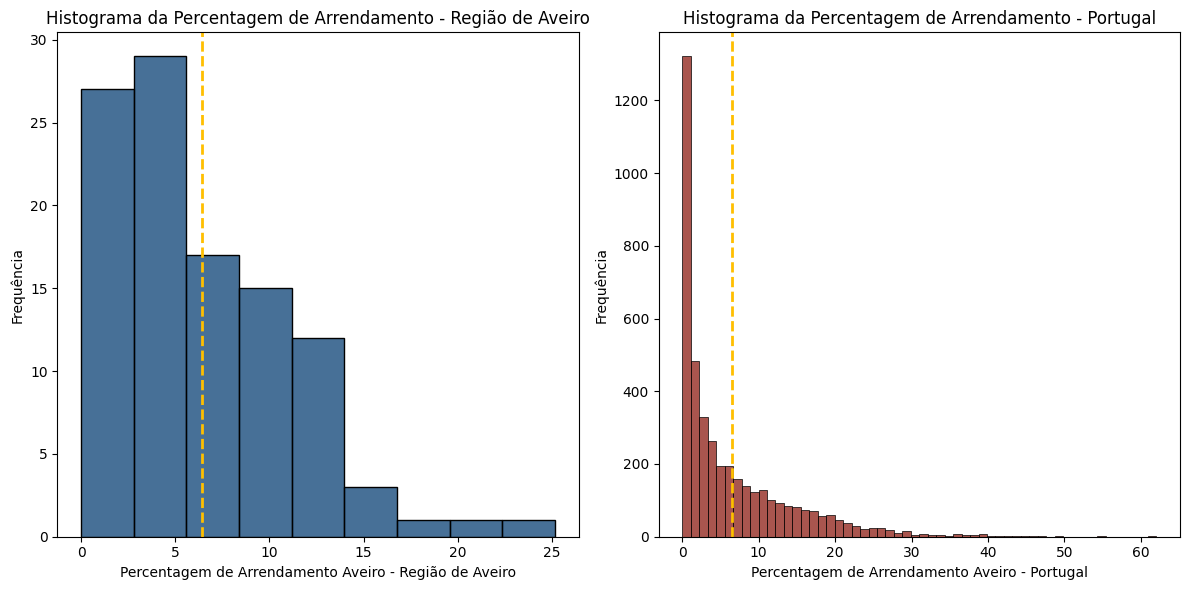

In [260]:
# Plot histograms for the first indicator
plot_histogram(df_BGRI_s, df_BGRI, 'arrendamento_perc', 'da Percentagem de Arrendamento', 'Percentagem de Arrendamento Aveiro', '#094074', '#8c1c13')

No primeiro indicador, ao analisar estes dois histogramas é essencial compreender o significado de cada eixo para interpretar adequadamente o que o gráfico nos está a comunicar. Neste caso, o eixo x representa a percentagem de arrendamento, enquanto o eixo y indica o número de freguesias.

Podemos observar que tanto o gráfico da Região de Aveiro como o de Portugal apresentam uma assimetria positiva (para a direita) na distribuição dos dados. Na Região de Aveiro, a maioria das freguesias, cerca de 60 das 106 analisadas, possui uma taxa de arrendamento que varia de 0% a 6%, com uma média de 6,42%.

De forma notável, ao compararmos com Portugal, vemos que mais de 1200 freguesias, de um total de 4260, têm uma taxa de arrendamento abaixo de 1%. No entanto, a média nacional (6,47%) está muito próxima da média da Região de Aveiro.
Por outro lado, na Região de Aveiro, apenas cerca de 10 freguesias apresentam uma taxa de arrendamento entre 14% e 25%, sendo este o limite superior, e não há valores extremos (outliers) nesse intervalos. No caso de Portugal, a situação é diferente, já que vemos que a taxa de arrendamento pode ultrapassar 60%, embora isso seja considerado um resultado atípico (outlier).

Em resumo, o primeiro indicador revela que tanto na Região de Aveiro quanto em todo o território de Portugal, a maioria das freguesias apresenta uma baixa taxa de arrendamento, seguindo uma distribuição assimétrica positiva.

<br>

---


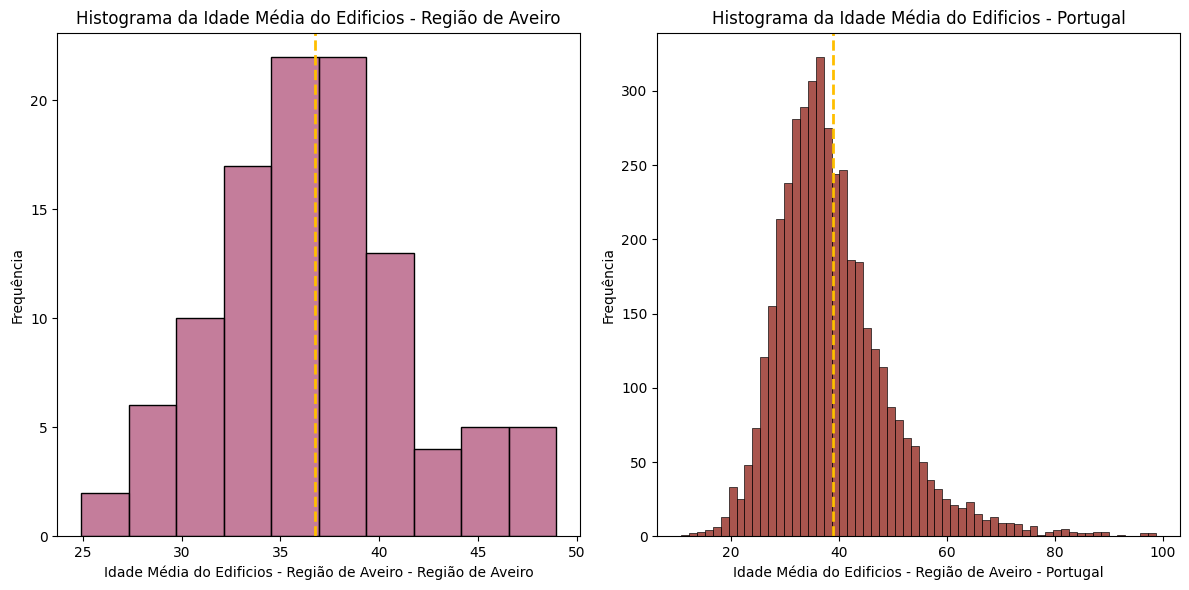

In [259]:
# Plot histograms for the second indicator
plot_histogram(df_BGRI_s, df_BGRI, 'IMédia_edif', 'da Idade Média do Edificios', 'Idade Média do Edificios - Região de Aveiro', '#b0527a', '#8c1c13')


No segundo indicador, relacionado com a idade média dos edifícios, o eixo x representa essa mesma idade média, enquanto o eixo y indica o número de freguesias.

Ao analisar o primeiro gráfico da Região de Aveiro, notamos que o histograma exibe simetria, com duas colunas de altura igual, posicionadas no centro. Estas duas colunas representam mais de 40 das 106 freguesias da região, cujas idades médias dos edifícios estão situadas entre os 34 e os 44 anos, com uma média geral de 36,75 anos. A idade média mínima registada é de 25 anos, enquanto a máxima é inferior a 50 anos.

No que diz respeito ao gráfico de Portugal, observamos uma distribuição assimétrica positiva para a direita. Pouco menos de 1500 freguesias apresentam uma idade média dos seus edifícios entre os 35 e os 40 anos, com uma média geral de 38,9 anos. A idade média mínima encontrada é inferior a 20 anos, enquanto a máxima é inferior a 100 anos.

Neste contexto, é importante salientar que, tal como nos gráficos anteriores, não existem valores atípicos (outliers) na Região de Aveiro, Neste contexto, é importante salientar que, tal como nos gráficos anteriores, não existem valores atípicos (outliers) na Região de Aveiro, ao contrario de Portugal.

<br>

---


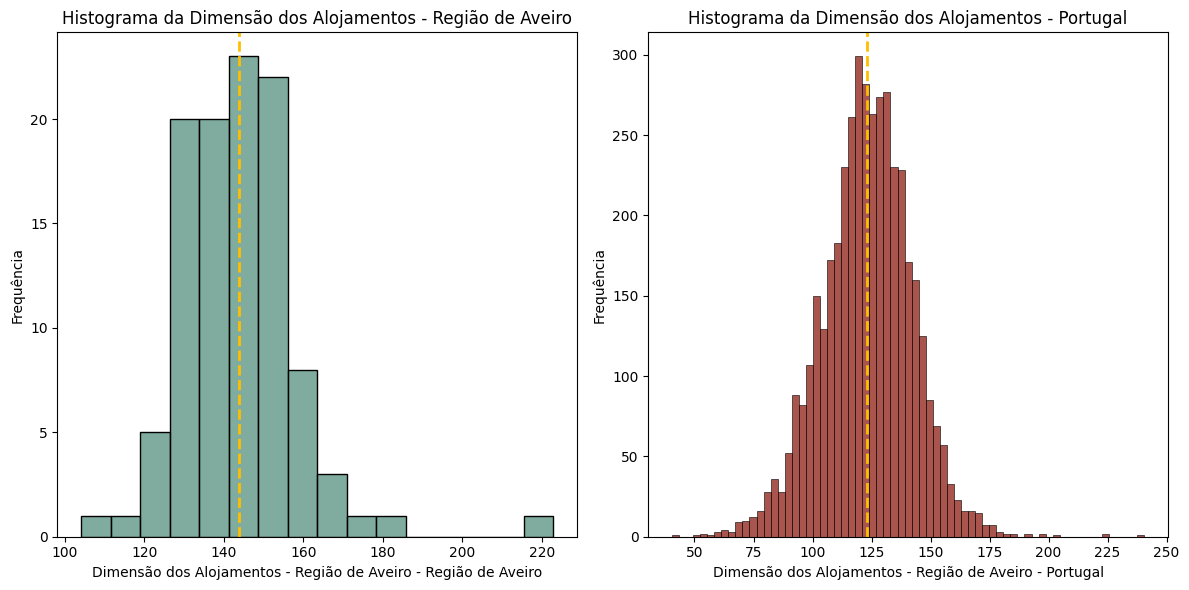

In [258]:
# Plot histograms for the third indicator
plot_histogram(df_BGRI_s, df_BGRI, 'dimensao_aloj', 'da Dimensão dos Alojamentos', 'Dimensão dos Alojamentos - Região de Aveiro', '#55917F', '#8c1c13')

No terceiro indicador, que se refere à dimensão média dos alojamentos, o eixo x representa essa mesma dimensão média dos alojamentos, enquanto o eixo y indica o número de freguesias.

Ao analisar o primeiro gráfico da Região de Aveiro, notamos que o histograma exibe simetria, com quatro colunas no meio que representam mais de 80 das 106 freguesias da região. Estas freguesias têm dimensões médias dos alojamentos situadas entre os 125 e os 155 m2, com uma média de 143,77 m2. A dimensão média mínima registada é de pouco mais de 100 m2, enquanto a máxima é um pouco mais de 220 m2, sendo, no entanto, esta última considerada um valor atípico (outlier). Excluindo o outlier, a dimensão média máxima é de pouco menos de 190 m2.

No que diz respeito ao gráfico de Portugal, observamos uma distribuição igualmente simétrica. Mais de 1800 freguesias apresentam uma dimensão média dos seus alojamentos entre os 110 e os 140 m2, com uma média geral de 123,06 m2. A dimensão média mínima encontrada é inferior a 50 m2, enquanto a máxima é inferior a 250 m2. Nestes dois casos, os resultados são considerados valores atípicos (outliers).

Estes dois gráficos são, em geral, bastante semelhantes, ambos exibindo simetria e ambos apresentando outliers tanto à esquerda como à direita. No entanto, a dimensão média dos alojamentos é ligeiramente mais elevada na Região de Aveiro em comparação com a média do país.

<br>

---


### **Boxplot**

     

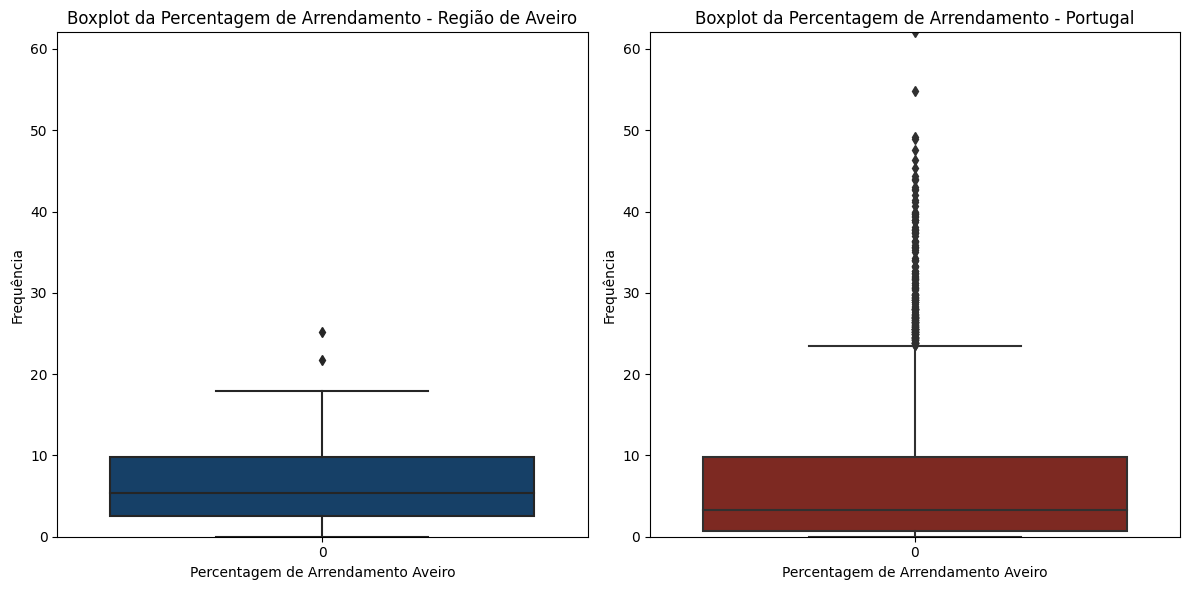

In [270]:
# Plot boxplots for the first indicator
plot_boxplot(df_BGRI_s, df_BGRI, 'arrendamento_perc', 'da Percentagem de Arrendamento', 'Percentagem de Arrendamento Aveiro', '#094074', '#8c1c13')

Nos boxplot da Percentagem do Arrendamento, tanto a nível nacional quanto na Região de Aveiro, são observados alguns valores extremos representados pelos pontos fora dos "bigodes". No entanto, a Região de Aveiro mostra uma menor quantidade de outliers, indicando uma maior consistência nas percentagens de arrendamento quando comparada ao país, onde a presença de valores extremos é mais pronunciada.

Podemos igualmente ver que a dispersão dos dados é menor na Região de Aveiro, evidenciada pela caixa mais estreita. Embora a mediana seja semelhante, os valores extremos, representados pelos "bigodes" do boxplot, são menos pronunciados em Aveiro, sugerindo uma maior homogeneidade nas percentagens de arrendamento em comparação com o país.

<br>

---



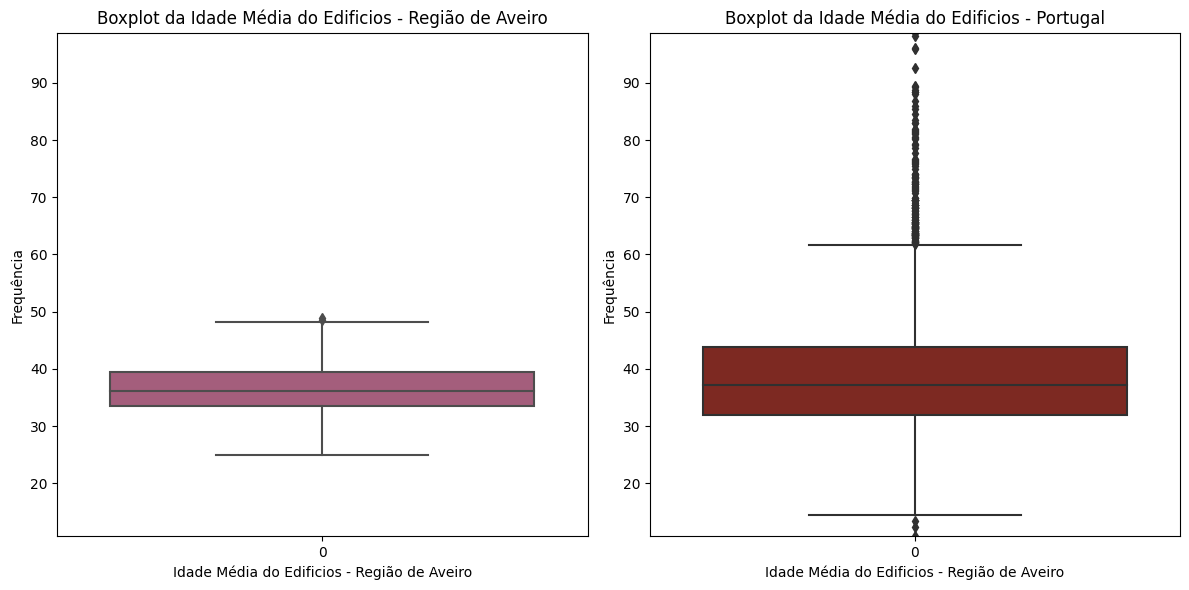

In [271]:
# Plot boxplots for the second indicator
plot_boxplot(df_BGRI_s, df_BGRI, 'IMédia_edif', 'da Idade Média do Edificios', 'Idade Média do Edificios - Região de Aveiro', '#b0527a', '#8c1c13')

Nos boxplot da Idade Média dos Edificios, a análise nacional revela uma distribuição mais ampla das idades, evidenciada por uma caixa mais longa que indica maior variabilidade. A mediana (representada pela linha no meio da caixa) e os quartis (bordas da caixa) são ligeiramente superiores no país, indicando uma idade média dos edificios um pouco mais elevada em comparação com a Região de Aveiro. Em contraste, a caixa da Região de Aveiro é mais compacta, sugerindo uma distribuição mais concentrada das idades nesta região específica.

É igualmente notável que o boxplot para Portugal apresenta uma distribuição mais ampla, com outliers mais evidentes quando comparada à Região de Aveiro. Os valores extremos nas idades dos edificios são mais pronunciados a nível nacional, sugerindo uma maior variabilidade demográfica em relação à Região de Aveiro, que, por sua vez, exibe uma distribuição mais concentrada e homogênea.

<br>

---

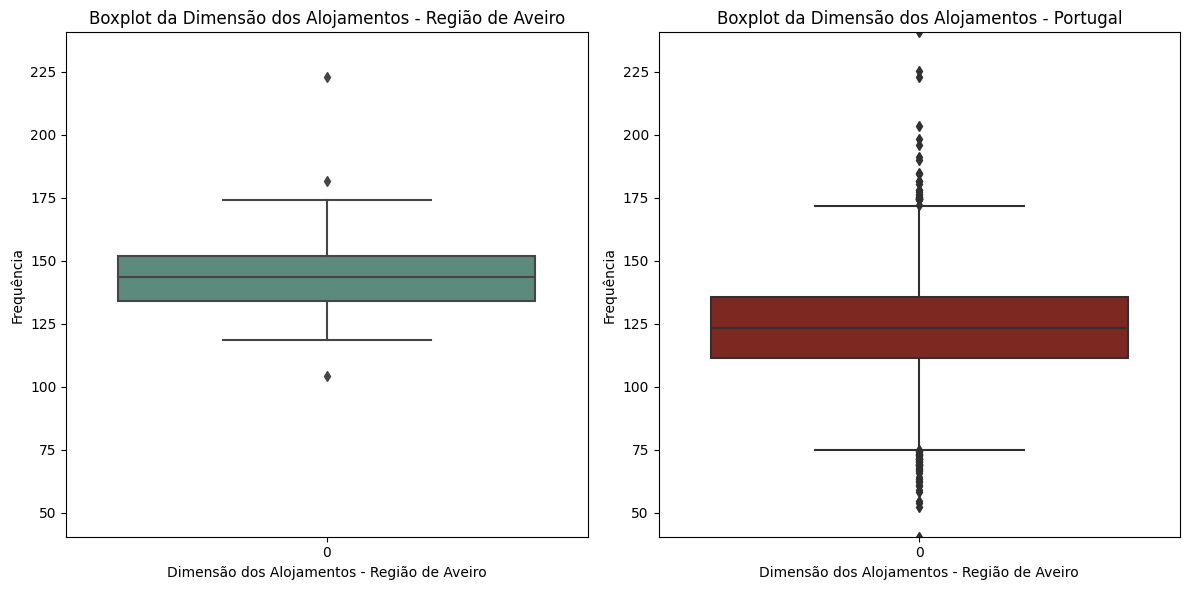

In [272]:
# Plot boxplots for the third indicator
plot_boxplot(df_BGRI_s, df_BGRI, 'dimensao_aloj', 'da Dimensão dos Alojamentos', 'Dimensão dos Alojamentos - Região de Aveiro', '#55917F', '#8c1c13')

Nos boxplots da Dimensão Média dos Alojamentos, tanto a nível nacional quanto na Região de Aveiro, são observados alguns outliers, porém, a Região de Aveiro exibe uma presença menos acentuada desses valores extremos. Isso sugere uma maior homogeneidade nos tamanhos dos alojamentos na região, ao passo que o país demonstra uma dispersão mais ampla, especialmente em relação aos valores extremos.

Além disso, a média da Dimensão Média dos Alojamentos na Região de Aveiro é mais elevada, conforme indicado pelo boxplot, onde uma caixa mais estreita evidencia uma menor dispersão nos tamanhos dos alojamentos. A análise da mediana e dos quartis também reforça essa tendência, mostrando que a Região de Aveiro tende a ter alojamentos ligeiramente maiores em média, em comparação com o restante do país.

<br>

---

### **MISSING VALUES**

*Missing values* ou "valores em falta" num conjunto de dados são um problema sério quando se trata de análise de dados. O termo *missing values* refere-se à ausência de dados numa amostra ou conjunto de dados.

Esta falta de completude pode ser resultado de várias falhas no armazenamento da informação, desde a perda de dados no sistema até erros humanos no preenchimento.

A ausência de dados nas amostras cria lacunas no conjunto de dados, o que, por sua vez, afeta as informações que se procura obter. Uma análise incompleta pode gerar incerteza nos resultados e, consequentemente, afetar a tomada de decisões.

Durante a análise dos conjuntos de dados e a criação dos gráficos, observamos que todos os valores estavam presentes e que não encontramos quaisquer valores ausentes (missing values) nos dados. Isso sugere que os dados estão completos e não houve problemas de informações em falta durante a coleta ou armazenamento."

## **III - ANÁLISE INFERENCIAL DE DADOS - Parte 1**

**Definição de Probabilidades**

**III.1. Definição das seguintes probabilidades:**
* **III.1.1...de uma freguesia ter uma percentagem de alojamento para arrendamento menos do que 5%**

In [226]:
freguesias_abaixo_de_5 = (df_BGRI_s['arrendamento_perc'] < 5).sum()

total_freguesias = len(df_BGRI_s)

percentagem_abaixo_de_5 = (freguesias_abaixo_de_5 / total_freguesias)*100

text = f"<p style='font-size:20px'>A percentagem de freguesias com percentagem de arrendamento abaixo de 5% é de {percentagem_abaixo_de_5:.2f}%.</p>"

HTML(text)

* **III.1.2...de uma freguesia ter uma idade média do seu edificio com mais de 50 anos**




In [227]:
freguesias_acima_de_50 = (df_BGRI_s['IMédia_edif'] > 50).sum()

total_freguesias = len(df_BGRI_s)

idade_acima_de_50 = (freguesias_acima_de_50 / total_freguesias) * 100

text = f"<p style='font-size:20px'>A percentagem de freguesias com idade média do seu edificio com mais de 50 anos é de {idade_acima_de_50:.2f}%.</p>"

HTML(text)

* **III.1.3...de uma freguesia ter a dimensão média dos seus alojamentoes entre 80 e 120m2**

In [228]:
freguesias_entre_80_e_120 = ((df_BGRI_s["dimensao_aloj"] >80) & (df_BGRI_s["dimensao_aloj"] <120)).sum()

total_freguesias = len(df_BGRI_s)

dimensao_entre_80_e_120 = (freguesias_entre_80_e_120 / total_freguesias) * 100

text = f"<p style='font-size:20px'>A percentagem de freguesias com alojamentos de dimensão entre 80 e 120m2 é de {dimensao_entre_80_e_120:.2f}%.</p>"

HTML(text)

## **III - ANÁLISE INFERENCIAL DE DADOS - Parte 2**

**Intervalos de Confiança**

**Definição dos intervalos de confiança  a 90%, 95% e a 99% para cada umas das varíáveis (percentagem de arrendamento, idade média dos edificios e dimensão média dos alojamentos) assim como a comparação dos resultados que se obeteriam para todo o país (toda a amosta).**

### **Percentagem de alojamento em arrendamento (amostra/Aveiro vs população/país)**

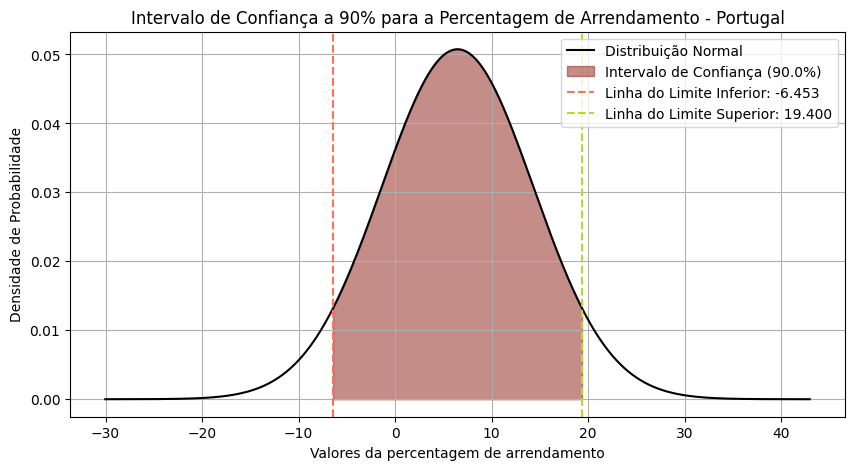

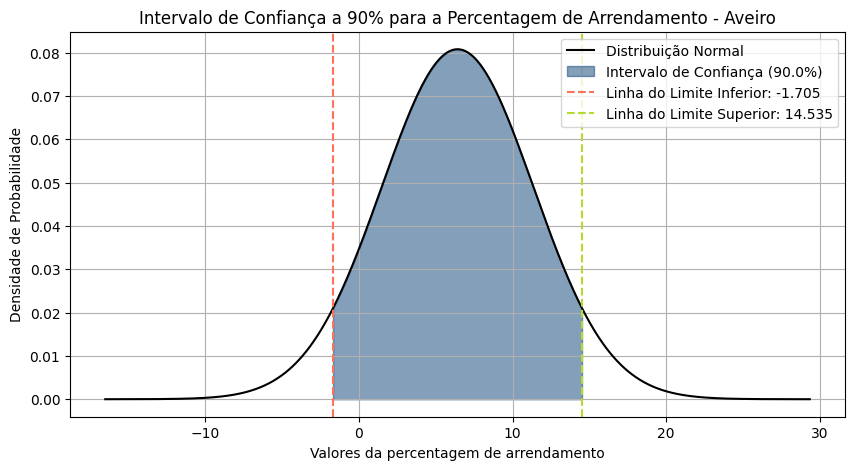

In [229]:
# Plotting for "Percentagem de alojamento em arrendamento" - 90% confidence interval
plot_confidence_interval(df_BGRI["arrendamento_perc"], 0.90, "#8c1c13", "Portugal", "Valores da percentagem de arrendamento", "Intervalo de Confiança a 90% para a Percentagem de Arrendamento - Portugal")
plot_confidence_interval(df_BGRI_s["arrendamento_perc"], 0.90, "#094074", "Aveiro", "Valores da percentagem de arrendamento", "Intervalo de Confiança a 90% para a Percentagem de Arrendamento - Aveiro")

Seja para a população (Portugal) como para a amostra (Região de Aveiro) as distribuições são simétricas (distribuição normal) para os valores da percentagem de arrendamento no intervalo de confiança de 90%.

Nos gráficos acima ilustra a distribuição da percentagem de arrendamento no intervalo de confiança de 90%., Assim sendo a parte colorida corresponde a 90% dos resultados tendo como ponto de partida a média, tendo assim de forma simétrica e através dos valores do erro padrão, um 45% de afastamento em cada direção do eixo das abcissas.

Este intervalo de confiança por sua vez quanto maior, irá diminuir a probabilidade de termos um valor que esteja fora do mesmo, como iremos ver nos seguintes gráficos para os intervalos de confiança maior.

Comparando os dois gráficos percebemos que existe uma maior concentração dos valores no caso das freguesias de aveiro, em comparação com todo o país, o que demonstra uma certa homogenidade na realidade vivida, não tendo grandes afastamentos do caso médio. É um resultado natural que suporta um bocado a ideia inicial de que é importante desconstruir o geral, neste caso, o país, nestas pequenas regiões e tomar a decisão a partir daqui. Em contrapartida, os valores para Portugal não tem esse pico central, estando muito mais dispersos.

O espaçamento entre as linhas dos limites inferior e superior são a prova disso mesmo, se compararmos de um gráfico para o outro essa distância.

- Valor da amplitude em Aveiro é igual 16.240
- Valor da amplitude em Portugal é igual 25.853
- A linha inferior dos valores de percentagem da população/Portugal é igual a -6.453 e a superior é igual a 19.400.

- A linha inferior dos valores de percentagem da amostra/região de aveiro é igual a -1.705 e a superior é igual a 14.535.
---

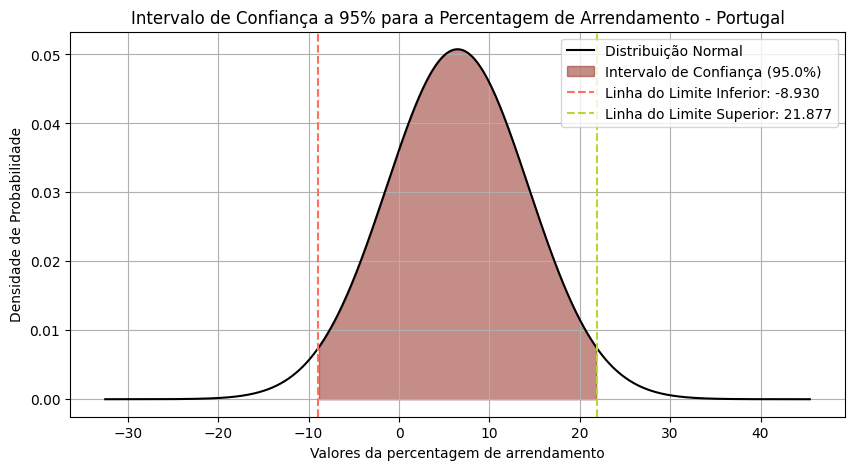

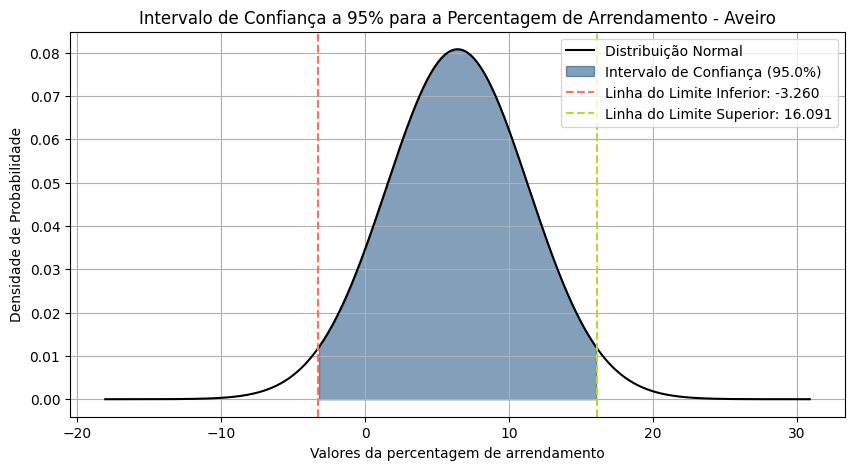

In [230]:
# Plotting for "Percentagem de alojamento em arrendamento" - 95% confidence interval
plot_confidence_interval(df_BGRI["arrendamento_perc"], 0.95, "#8c1c13", "Portugal", "Valores da percentagem de arrendamento", "Intervalo de Confiança a 95% para a Percentagem de Arrendamento - Portugal")
plot_confidence_interval(df_BGRI_s["arrendamento_perc"], 0.95, "#094074", "Aveiro", "Valores da percentagem de arrendamento", "Intervalo de Confiança a 95% para a Percentagem de Arrendamento - Aveiro")

Seja para a população (Portugal) como para a amostra (Região de Aveiro) as distribuições são simétricas (distribuição normal) para os valores da percentagem de arrendamento no intervalo de confiança de 95%.

- A linha inferior dos valores de percentagem da população/Portugal é igual a -8.930 e a superior é igual a 21.877.

- A linha inferior dos valores de percentagem da amostra/região de aveiro é igual a -3.260 e a superior é igual a 16.091.

---

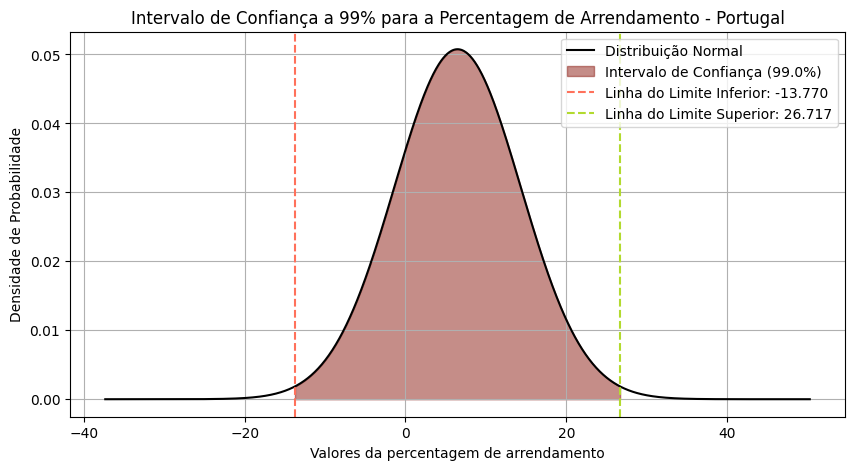

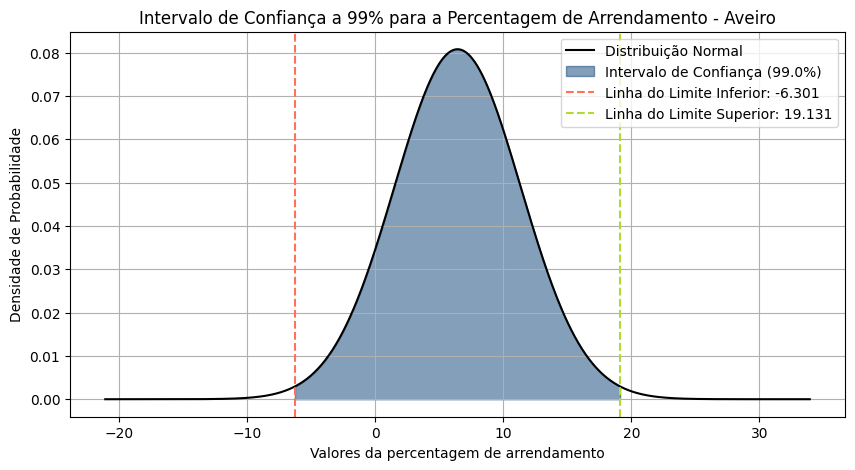

In [231]:
# Plotting for "Percentagem de alojamento em arrendamento" - 99% confidence interval
plot_confidence_interval(df_BGRI["arrendamento_perc"], 0.99, "#8c1c13", "Portugal", "Valores da percentagem de arrendamento", "Intervalo de Confiança a 99% para a Percentagem de Arrendamento - Portugal")
plot_confidence_interval(df_BGRI_s["arrendamento_perc"], 0.99, "#094074", "Aveiro", "Valores da percentagem de arrendamento", "Intervalo de Confiança a 99% para a Percentagem de Arrendamento - Aveiro")

Seja para a população (Portugal) como para a amostra (Região de Aveiro) as distribuições são simétricas (distribuição normal) para os valores da percentagem de arrendamento no intervalo de confiança de 99%.

- A linha inferior dos valores de percentagem da região de aveiro é igual a -6.301 e a superior é igual a 19.131.

- A linha inferior dos valores de percentagem da população/Portugal é igual a -13.770 e a superior é igual a 26.717.

---

### **Idade Média do edificado (amostra/Aveiro vs população/país)**


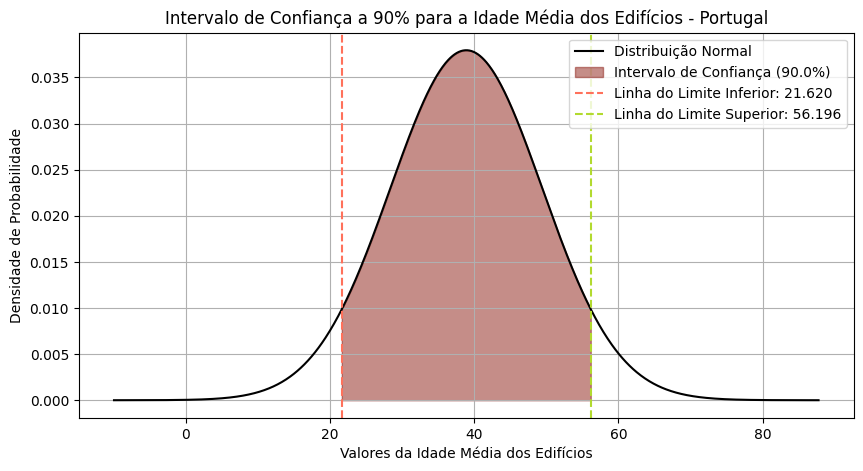

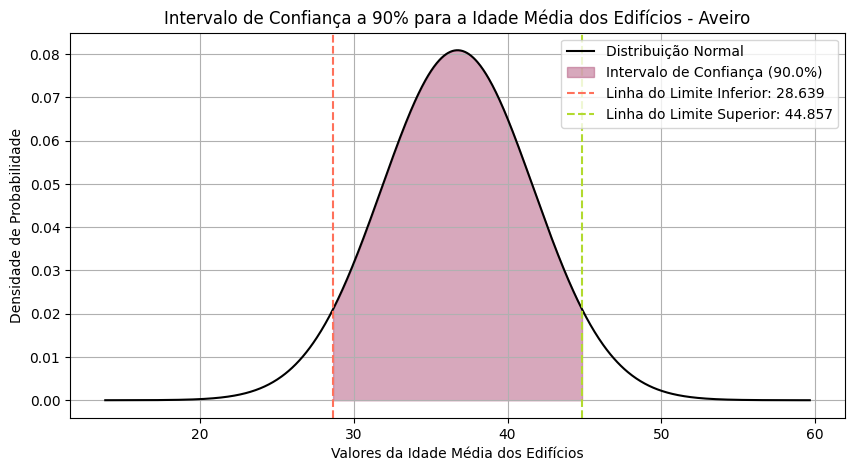

In [232]:
# Plotting for "Idade Média" - 90% confidence interval
plot_confidence_interval(df_BGRI['IMédia_edif'], 0.90, "#8c1c13", "Portugal", "Valores da Idade Média dos Edifícios", "Intervalo de Confiança a 90% para a Idade Média dos Edifícios - Portugal")
plot_confidence_interval(df_BGRI_s['IMédia_edif'], 0.90, "#b0527a", "Aveiro", "Valores da Idade Média dos Edifícios", "Intervalo de Confiança a 90% para a Idade Média dos Edifícios - Aveiro")

Seja para a população (Portugal) como para a amostra (Região de Aveiro) as distribuições são simétricas (distribuição normal) para a idade média dos edifícios no intervalo de confiança de 90%.

- A linha inferior da idade média dos edifícios da região de aveiro é igual a 28.639 e a superior é igual a 44.857. A média dos prédios é de 36.748.

- A linha inferior idade média dos edifícios da população/Portugal é igual a 21.620 e a superior é igual a 56.196. A média dos prédios é de 38.908.

Logo por estes números verificamos que Aveiro tem em média prédios ligeiramente mais novos, ou com uma idade média menor.

A grande diferença entre estas duas realidades prende-se na distruição dos valores. Aveiro tem uma grande concentração nestes 90% em comparação com Portugal, que os dados apesar do mesmo intervalo de confiança a largura dos dados são muito diferentes, mostrando que as casas tem uma idade mais homogênea.


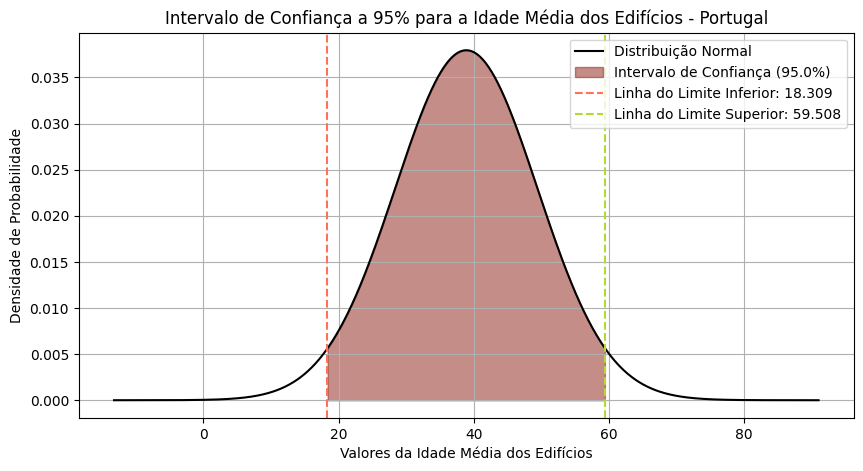

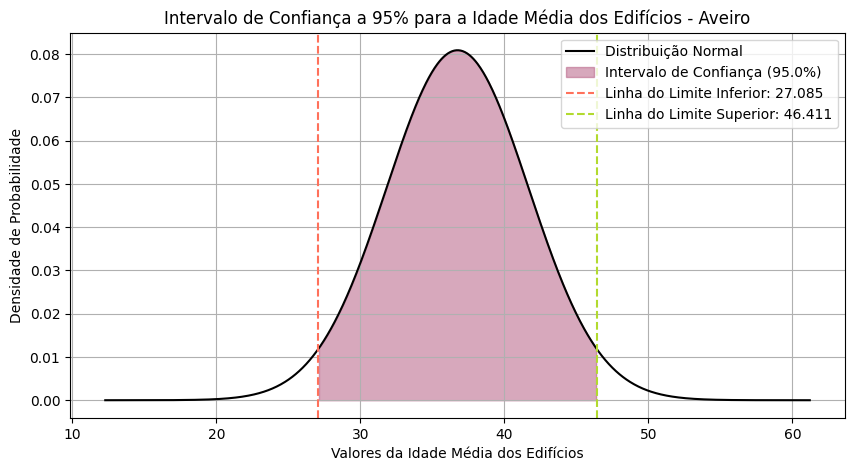

In [233]:
# Plotting for "Idade Média" - 95% confidence interval
plot_confidence_interval(df_BGRI['IMédia_edif'], 0.95, "#8c1c13", "Portugal", "Valores da Idade Média dos Edifícios", "Intervalo de Confiança a 95% para a Idade Média dos Edifícios - Portugal")
plot_confidence_interval(df_BGRI_s['IMédia_edif'], 0.95, "#b0527a", "Aveiro", "Valores da Idade Média dos Edifícios", "Intervalo de Confiança a 95% para a Idade Média dos Edifícios - Aveiro")

Seja para a população (Portugal) como para a amostra (Região de Aveiro) as distribuições são simétricas (distribuição normal) para a idade média dos edifícios no intervalo de confiança de 95%.

- A linha inferior da idade média dos edifícios da região de aveiro é igual a 27.085 e a superior é igual a 46.411.

- A linha inferior idade média dos edifícios da população/Portugal é igual a 18.309 e a superior é igual a 59.508.

*Obs.:* Tanto a média da população como a média amostral estão no intervalo de confiança.

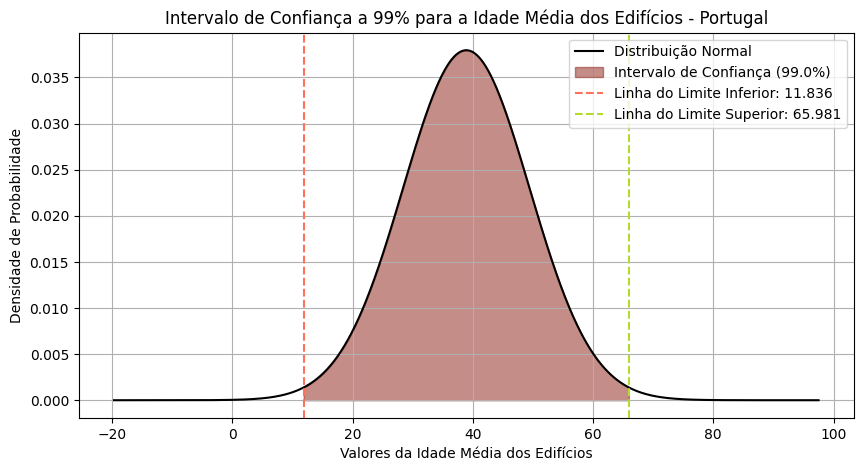

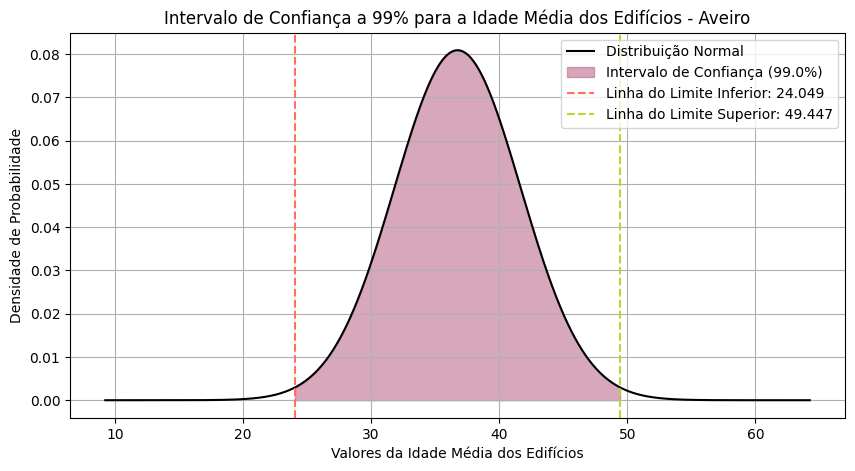

In [234]:
# Plotting for "Idade Média" - 99% confidence interval
plot_confidence_interval(df_BGRI['IMédia_edif'], 0.99, "#8c1c13", "Portugal", "Valores da Idade Média dos Edifícios", "Intervalo de Confiança a 99% para a Idade Média dos Edifícios - Portugal")
plot_confidence_interval(df_BGRI_s['IMédia_edif'], 0.99, "#b0527a", "Aveiro", "Valores da Idade Média dos Edifícios", "Intervalo de Confiança a 99% para a Idade Média dos Edifícios - Aveiro")

Seja para a população (Portugal) como para a amostra (Região de Aveiro) as distribuições são simétricas (distribuição normal) para a idade média dos edifícios no intervalo de confiança de 99%.

- A linha inferior da idade média dos edifícios da região de aveiro é igual a 24.049 e a superior é igual a 49.447.

- A linha inferior idade média dos edifícios da população/Portugal é igual a 11.836 e a superior é igual a 65.981.

*Obs.:* Tanto a média da população como a média amostral estão no intervalo de confiança.

Nos seguintes gráficos de 95% e 99% verificamos que abrindo o intervalo, teremos valor mais semelhantes para Aveiro, que mesmo perdendo alguma precisão nos intervalos devido ao aumento da largura do mesmo, os valores não irão oscilar tanto, nem ter grandes diferenças em comparação à média amostral. Por outro lado nos gráficos referentes a Portugal, com o aumentar da largura do intervalo, os valores começam a variar muito, estamos os valores compreendidos num intervalo de 54.145 anos (Gráfico 99% IC). No caso de aveiro o valor é menos de metade do de Portugal 24.95 anos (Gráfico 99% IC).



---

### **Dimensao média dos alojamento (amostra vs país)**

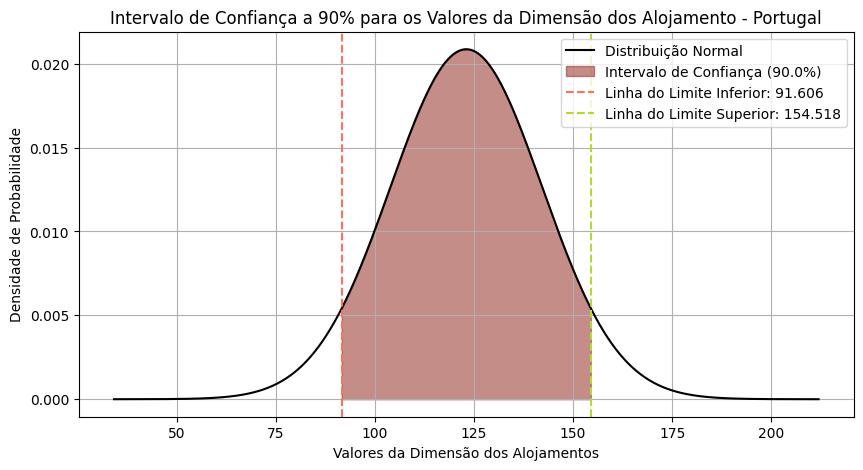

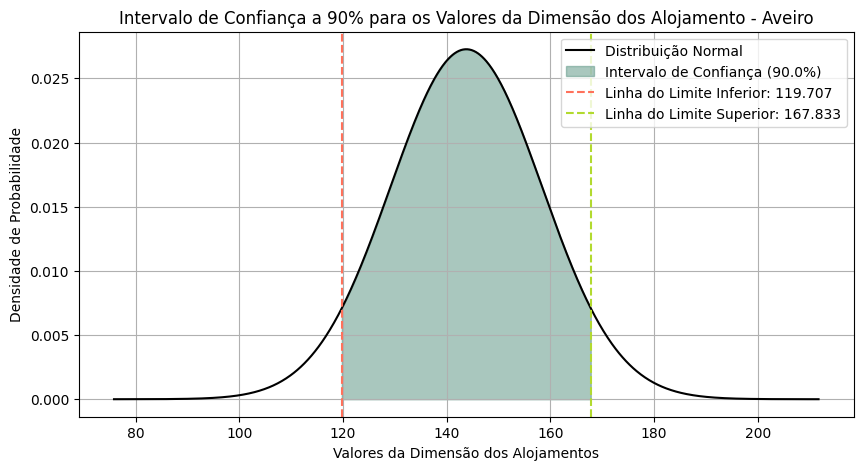

In [235]:
# Plotting for 90% confidence interval
plot_confidence_interval(df_BGRI["dimensao_aloj"], 0.90, "#8c1c13", "Portugal", "Valores da Dimensão dos Alojamentos", "Intervalo de Confiança a 90% para os Valores da Dimensão dos Alojamento - Portugal")
plot_confidence_interval(df_BGRI_s["dimensao_aloj"], 0.90, "#55917F", "Aveiro", "Valores da Dimensão dos Alojamentos", "Intervalo de Confiança a 90% para os Valores da Dimensão dos Alojamento - Aveiro")

Seja para a população (Portugal) como para a amostra (Região de Aveiro) as distribuições são simétricas (distribuição normal) para dimensão de alojamentos no intervalo de confiança de 90%.

- A linha inferior da dimensão dos alojamentos da região de aveiro é igual a 91.606 e a superior é igual a 154.518.

- A linha inferior da dimensão dos alojamentos da população/Portugal é igual a 119.707 e a superior é igual a 167.833.

*Obs.:* Tanto a média da população como a média amostral estão no intervalo de confiança.

Estes dois gráficos demonstram a distribuição dos valores da dimensão dos Alojamentos para a população geral (Portugal) e para a região de Aveiro.

Podemos concluir que tem uma média amostral diferente, sendo a de Aveiro superior à do páis, logo em aveiro existem em média casas de maior dimensão, comparado ao geral do país.

Neste intervalo é onde não se verifica grandes diferenças entre a amplitude dos intervalos de confiança, ou seja a posição do máximo e minimo para este IC de 90%. Mostrando que os valores das diferentes amostras distribuiem-se de forma semelhante na relação ao valor médio. Apesar disso o valor de Portugal mantem-se superior e teremos uma ligeira mas maior diversidade de valores nesse intervalo em comparação com Aveiro.

De realçar que o limite inferior para Aveiro (119.707), é semelhante à média amostral para o país (123.062) que só por si já reforça  a conclusão que as casas em Aveiro tem em média maior dimensão.


---

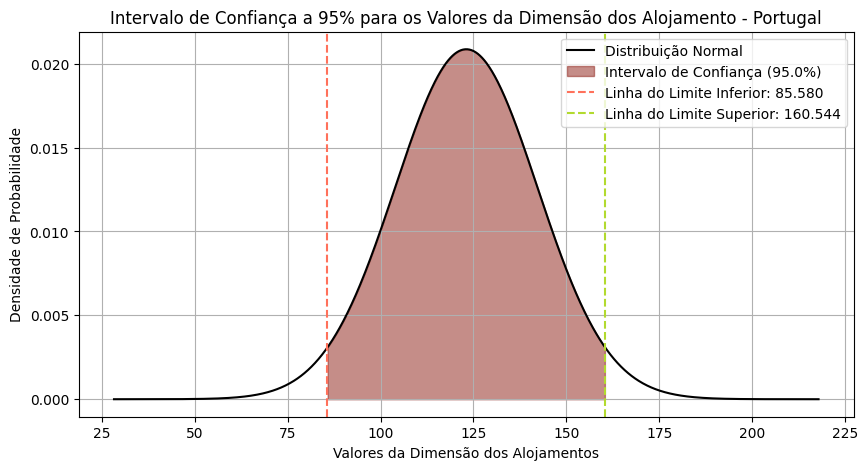

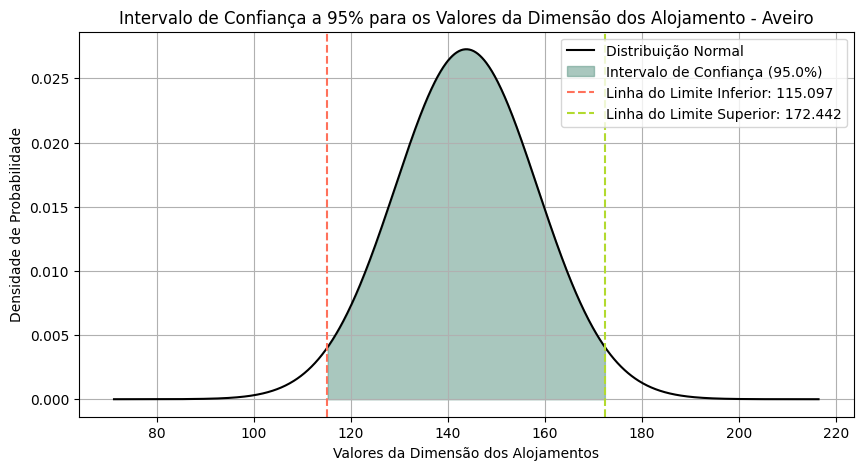

In [236]:
# Plotting for 95% confidence interval
plot_confidence_interval(df_BGRI["dimensao_aloj"], 0.95, "#8c1c13", "Portugal", "Valores da Dimensão dos Alojamentos", "Intervalo de Confiança a 95% para os Valores da Dimensão dos Alojamento - Portugal")
plot_confidence_interval(df_BGRI_s["dimensao_aloj"], 0.95, "#55917F", "Aveiro", "Valores da Dimensão dos Alojamentos", "Intervalo de Confiança a 95% para os Valores da Dimensão dos Alojamento - Aveiro")

Seja para a população (Portugal) como para a amostra (Região de Aveiro) as distribuições são simétricas (distribuição normal) para dimensão de alojamentos no intervalo de confiança de 95%.

- A linha inferior da dimensão dos alojamentos da região de aveiro é igual a 115.097 e a superior é igual a 172.442.

- A linha inferior da dimensão dos alojamentos da população/Portugal é igual a 85.580 e a superior é igual a 160.544

*Obs.:* Tanto a média da população como a média amostral estão no intervalo de confiança.

---

---

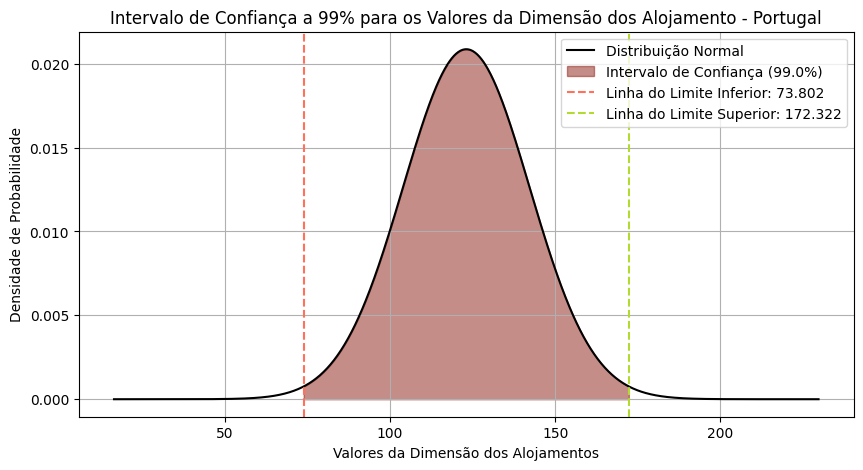

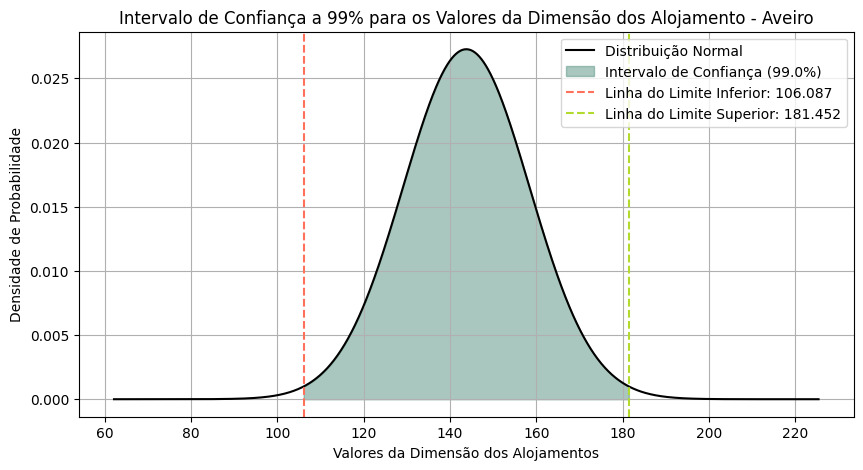

In [237]:
# Plotting for 99% confidence interval
plot_confidence_interval(df_BGRI["dimensao_aloj"], 0.99, "#8c1c13", "Portugal", "Valores da Dimensão dos Alojamentos", "Intervalo de Confiança a 99% para os Valores da Dimensão dos Alojamento - Portugal")
plot_confidence_interval(df_BGRI_s["dimensao_aloj"], 0.99, "#55917F", "Aveiro", "Valores da Dimensão dos Alojamentos", "Intervalo de Confiança a 99% para os Valores da Dimensão dos Alojamento - Aveiro")

Tanto a população (Portugal) como a amostra (Região de Aveiro) as suas distribuições são simétricas (distribuição normal) para dimensão de alojamentos no intervalo de confiança de 99%.

- A linha inferior da dimensão dos alojamentos da região de aveiro é igual a 73.802 e a superior é igual a 181.452.

- A linha inferior da dimensão dos alojamentos da população/Portugal é igual a 73.802 e a superior é igual a 172.322

*Obs.:* Tanto a média da população como a média amostral estão no intervalo de confiança.

A respeito da evolução dos gráficos para os valores dos IC de 95 e 99%, faz-nos perder aqui alguma, precisão que tinhamos anteriormente. A concentração dos valores da dimensão dos alojamentos, ajuda contudo que os nossos valores admissiveis apesar de distantes, não tenham valores muito desproporcionais e afastados da média amostral.

---
